# Научные вычисления в Python - NumPy & SciPy

## Создание матриц и векторов

- Известные типы: числа (целые, с плавающей точкой), строки, контейнеры
- В математике оперируют с *векторами* в $n$-мерном пространстве - одномерные массивы
- Также существуют объекты, представимые двумерными массивами. Они называются *матрицами*

## Операции c векторами

- Сложение/вычитание векторов - поэлеметно: 
$$
z = x \pm y \iff z_i = x_i \pm y_i.
$$
Вектора $x,y, z$ должны иметь одинаковую размерность
- Умножение векторов на число: 
$$
z = \alpha x \iff z_i = \alpha x_i
$$
- Скалярное произведение: 
$$
(x, y) = \langle x, y \rangle = \sum\limits_{i=1}^n x_iy_i
$$

## Операции с матрицами

- Сложение/вычитание матриц - поэлементно: 
$$
C = A \pm B \iff c_{ij} = a_{ij} \pm b_{ij},
$$
где $i = 1,\dots,m$, $j=1,\dots,n$. Размерности слагаемых и разультата должны совпадать
- Умножение матрицы на скаляр - поэлементно: 
$$
C = \alpha A \iff c_{ij} = \alpha a_{ij}
$$
- Умножение матрицы на вектор - вычисление линейной комбинации столбцов матрицы: 
$$
y = Ax \iff y_i = \sum_{j=1}^n a_{ij}x_j
$$
Размерность $y$ - количество строк матрицы $A$. Размерность $x$ - количество столбцов матрицы $A$.
- Умножение матрицы на матрицу - обобщение умножения матрицы на вектор, теперь векторов много и они записаны в матрицу. 
$$
C = AB \iff c_{ij} = \sum_{l=1}^n a_{il}b_{lj}
$$
Размерности матриц: $A \in \mathbb{R}^{m \times n}$, $B \in \mathbb{R}^{n \times k}$ и $C \in \mathbb{R}^{m\times k}$

### Стандартные матрицы

- Нулевая матрица
- Единичная матрица $I$ или $E$ - квадратная: на диагонали 1, везде вне диагонали 0
- Диагональая матрица - не нули только на диагонали

In [1]:
import numpy as np

In [7]:
matrix_from_list = np.array([[1, 3, 4],
                             [2, 0, 5],
                             [4, 4, 1],
                             [0, 1, 0]])

vector_from_list = np.array([2, 1, 3])

print 'The matrix is\n{mat}\n\nthe vector is\n{vec}'\
        .format(vec=vector_from_list, mat=matrix_from_list)

The matrix is
[[1 3 4]
 [2 0 5]
 [4 4 1]
 [0 1 0]]

the vector is
[2 1 3]


## Основные операции

In [3]:
# Умножение матрицы на вектор
matrix_from_list.dot(vector_from_list)

array([17, 19, 15,  1])

### Трансляция

In [8]:
print matrix_from_list
print vector_from_list
matrix_from_list + vector_from_list

[[1 3 4]
 [2 0 5]
 [4 4 1]
 [0 1 0]]
[2 1 3]


array([[3, 4, 7],
       [4, 1, 8],
       [6, 5, 4],
       [2, 2, 3]])

### Явное указание типа элементов матрицы/вектора

In [9]:
single_precision_vector = np.array([1, 3, 5, 2], dtype=np.float32)
single_precision_vector.dtype

dtype('float32')

### Преобразование типов

In [10]:
vector_from_list.dtype

dtype('int64')

In [11]:
vector_from_list.astype(np.int16)

array([2, 1, 3], dtype=int16)

### Размерности: согласованность размерностей необходимый элемент успешных вычислений!

In [13]:
row_vector = np.array([[1,2,3]])

print 'New vector {} has dimensionality {}'\
        .format(row_vector, row_vector.shape)
print "Dimension of the matris is {}".format(matrix_from_list.shape)
print 'The dot-product is: ', matrix_from_list.dot(row_vector)

 New vector [[1 2 3]] has dimensionality (1, 3)
Dimension of the matris is (4, 3)
The dot-product is: 

ValueError: shapes (4,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [14]:
singleton_vector = row_vector.squeeze()
print 'Squeezed vector {} has shape {}'.format(singleton_vector, singleton_vector.shape)

 Squeezed vector [1 2 3] has shape (3,)


In [15]:
matrix_from_list.dot(singleton_vector)

array([19, 17, 15,  2])

### Добавление размерности

In [17]:
print singleton_vector[:, np.newaxis]

[[1]
 [2]
 [3]]


In [24]:
mat = np.arange(12)
print mat
print mat.reshape(-1, 4)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [25]:
print singleton_vector[:, None]

[[1]
 [2]
 [3]]


## Индексирвоание и slicing

In [26]:
vector12 = np.arange(12)
vector12

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Угадайте, что будет результатом следующих операций:
```python
vector12[:3]
vector12[-1]
vector12[:-2]
vector12[3:7]
vector12[::2]
vector12[::-1]
```

In [27]:
matrix43 = vector12.reshape(4, 3)
matrix43

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Угадайте, что будет результатом следующих операций:
```python
matrix43[:, 0]
matrix43[-1, :]
matrix43[::2, :]
matrix43[:3, :-1]
matrix43[3:, 1]
```

### Отличие от MATLAB

- Индексация с 0
- Массивы в NumPy по умолчанию хранятся по столбцам

## Представление (view) vs Копия

- Работа с представлениями более эффективна и предпочтительна

- Представление возвращатся при использование основных slicing-операций

- Детали: http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

Сделать копию просто

In [28]:
matrix43_copy = matrix43[:]

## Изменение размерностей (reshaping)

In [29]:
matrix_to_reshape = np.random.randint(10, 99, size=(6, 4))
matrix_to_reshape

array([[16, 40, 41, 36],
       [28, 91, 12, 22],
       [32, 62, 52, 97],
       [26, 87, 16, 59],
       [20, 40, 34, 92],
       [39, 56, 22, 15]])

In [30]:
reshaped_matrix = matrix_to_reshape.reshape(8, 3)
reshaped_matrix

array([[16, 40, 41],
       [36, 28, 91],
       [12, 22, 32],
       [62, 52, 97],
       [26, 87, 16],
       [59, 20, 40],
       [34, 92, 39],
       [56, 22, 15]])

## Reshape всегда возвращает представление

In [31]:
reshaped_matrix[-1, 0] = 1
np.set_printoptions(formatter={'all':lambda x: '_{}_'.format(x) if x < 10 else str(x)})
matrix_to_reshape[:]

array([[16, 40, 41, 36],
       [28, 91, 12, 22],
       [32, 62, 52, 97],
       [26, 87, 16, 59],
       [20, 40, 34, 92],
       [39, _1_, 22, 15]])

In [32]:
np.set_printoptions()

## Булева индексация

In [33]:
idx = matrix43 > 4
matrix43[idx]

array([ 5,  6,  7,  8,  9, 10, 11])

## Полезные NumPy-функции

- ``np.eye()`` - создание единичной матрицы
- ``np.ones()`` - создание матрицы из всех единиц
- ``np.zeros()`` - создание нулевой матрицы
- ``np.diag()`` - создание диагональной матрицы или извлечение диагонали из данной матрицы

### Пример

Построить трёхдиагональную матрицу с -2 на диагонали и 1 на над- и поддиагоналях

In [34]:
def three_diagonal(N):
    A = np.zeros((N, N), dtype=np.int)
    for i in range(N):
        A[i, i] = -2
        if i > 0:
            A[i, i-1] = 1
        if i < N-1:
            A[i, i+1] = 1
    return A

print three_diagonal(5)

[[-2  1  0  0  0]
 [ 1 -2  1  0  0]
 [ 0  1 -2  1  0]
 [ 0  0  1 -2  1]
 [ 0  0  0  1 -2]]


In [35]:
def numpy_three_diagonal(N):
    main_diagonal = -2 * np.eye(N)
    
    suddiag_value = np.ones(N-1,)
    lower_subdiag = np.diag(suddiag_value, k=-1)
    upper_subdiag = np.diag(suddiag_value, k=1)
    
    result = main_diagonal + lower_subdiag + upper_subdiag
    return result.astype(np.int)

numpy_three_diagonal(5)

array([[-2,  1,  0,  0,  0],
       [ 1, -2,  1,  0,  0],
       [ 0,  1, -2,  1,  0],
       [ 0,  0,  1, -2,  1],
       [ 0,  0,  0,  1, -2]])

### "Сокращатели" (reducers): sum, mean, max, min, all, any

In [40]:
A = numpy_three_diagonal(5)
A[0, -1] = 5
A[-1, 0] = 3

print "Исходная матрица \n", A
print "Сумма элементов матрицы A =", A.sum()
print "Минимальный элемент матрицы А =", A.min()
print "Максимальный в каждом столбце матрицы A =", A.max(axis=0)
print "Сумма элементов в столбцах матрицы А =", A.sum(axis=0)
print "Среднее значение в строках матрицы А =", A.mean(axis=1)
print "Есть ли в каждой строке матрицы элемент больший 4", (A > 4).any(axis=1)

Исходная матрица 
[[-2  1  0  0  5]
 [ 1 -2  1  0  0]
 [ 0  1 -2  1  0]
 [ 0  0  1 -2  1]
 [ 3  0  0  1 -2]]
Сумма элементов матрицы A = 6
Минимальный элемент матрицы А = -2
Максимальный в каждом столбце матрицы A = [3 1 1 1 5]
Сумма элементов в столбцах матрицы А = [2 0 0 0 4]
Среднее значение в строках матрицы А = [ 0.8  0.   0.   0.   0.4]
Есть ли в каждой строке матрицы элемент больший 4 [ True False False False False]


### Математические функции в NumPy

In [25]:
print np.pi

3.14159265359


In [41]:
args = np.arange(0, 2.5*np.pi, 0.5*np.pi)
print args

[ 0.          1.57079633  3.14159265  4.71238898  6.28318531]


In [42]:
print np.sin(args)

[  0.00000000e+00   1.00000000e+00   1.22464680e-16  -1.00000000e+00
  -2.44929360e-16]


In [43]:
print np.round(np.sin(args), decimals=)

[ 0.  1.  0. -1. -0.]


### Управление форматом вывода

In [46]:
'{}, {:.1%}, {:e}, {:.2f}, {:.0f}'.format(*np.sin(args))

'0.0, 100.0%, 1.224647e-16, -1.00, -0'

In [47]:
np.set_printoptions(formatter={'all':lambda x: '{:.2f}'.format(x)})
print np.sin(args)
np.set_printoptions()

[0.00 1.00 0.00 -1.00 -0.00]


### Сетки

- ``np.linspace``
- ``np.meshgrid``

In [48]:
print np.linspace(1, 10, 100)
print len(np.linspace(1, 10, 100))

[  1.           1.09090909   1.18181818   1.27272727   1.36363636
   1.45454545   1.54545455   1.63636364   1.72727273   1.81818182
   1.90909091   2.           2.09090909   2.18181818   2.27272727
   2.36363636   2.45454545   2.54545455   2.63636364   2.72727273
   2.81818182   2.90909091   3.           3.09090909   3.18181818
   3.27272727   3.36363636   3.45454545   3.54545455   3.63636364
   3.72727273   3.81818182   3.90909091   4.           4.09090909
   4.18181818   4.27272727   4.36363636   4.45454545   4.54545455
   4.63636364   4.72727273   4.81818182   4.90909091   5.           5.09090909
   5.18181818   5.27272727   5.36363636   5.45454545   5.54545455
   5.63636364   5.72727273   5.81818182   5.90909091   6.           6.09090909
   6.18181818   6.27272727   6.36363636   6.45454545   6.54545455
   6.63636364   6.72727273   6.81818182   6.90909091   7.           7.09090909
   7.18181818   7.27272727   7.36363636   7.45454545   7.54545455
   7.63636364   7.72727273   7.818181

### Пример

Функция 
$$
f(x, y) = \sin(x+y)
$$
на некоторой сетке.

In [49]:
linear_index = np.linspace(0, np.pi, 10, endpoint=True)
mesh_x, mesh_y = np.meshgrid(linear_index, linear_index)
values_3D = np.sin(mesh_x + mesh_y)

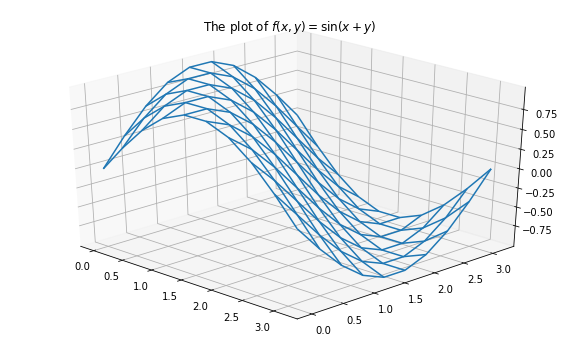

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot_wireframe(mesh_x, mesh_y, values_3D)
ax.view_init(azim=-45, elev=30)

plt.title('The plot of $f(x, y) = \sin(x+y)$')

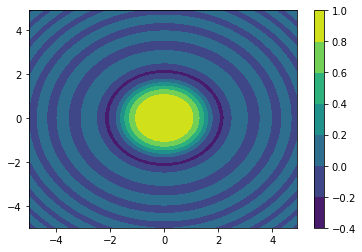

In [51]:
# Линии уровня
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.colorbar()

### Можете ли Вы изобразить эту функцию в 3D?

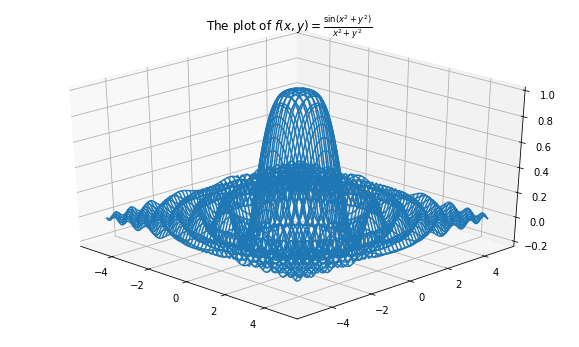

In [52]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot_wireframe(xx, yy, z)
ax.view_init(azim=-45, elev=30)

plt.title(r'The plot of $f(x, y) = \frac{\sin(x^2+y^2)}{x^2 + y^2}$')

## Заключение про NumPy

- Полная документация доступна по [ссылке](https://docs.scipy.org/doc/numpy-1.12.0/reference/)
- NumPy - рабочая лошадка для решения вычислительных задач
- Поддерживает различные стандартные виды плотных матриц и операций с ними
- Все операции выполняются оптимизированной библиотекой [MKL](https://stackoverflow.com/questions/17513044/difference-between-numpy-and-numpy-mkl)

# SciPy

- Полная документация доступна по [ссылке](https://docs.scipy.org/doc/scipy/reference/)
- Содержит множество пакетов для различных задач: оптимизация, обработа сигналов, статистика, обработка изображений, etc.
- Поддерживает работу с разреженными матрицами, сохранёнными в различных форматах

## Создание разреженной матрицы

- Разреженные матрицы - матрицы, в которых число ненулей очень мало по сравнению с числом элементов в матрице
- Для хранения разреженной матрицы нужно хранить только ненулевые элементы и их индексы

In [58]:
import scipy.sparse as sp

def scipy_three_diagonal(N):
    main_diagonal = -2 * np.ones(N, )
    suddiag_values = np.ones(N-1,)
    
    diagonals = [main_diagonal, suddiag_values, suddiag_values]
    # Another option: use sp.eye(N) and add subdiagonals
    offsets = [0, 1, -1]
    
    result = sp.diags(diagonals, offsets, shape=(N, N), format='csr')
    return result

my_sparse_matrix = scipy_three_diagonal(5)
print my_sparse_matrix

  (0, 0)	-2.0
  (0, 1)	1.0
  (1, 1)	-2.0
  (1, 2)	1.0
  (1, 0)	1.0
  (2, 2)	-2.0
  (2, 3)	1.0
  (2, 1)	1.0
  (3, 3)	-2.0
  (3, 4)	1.0
  (3, 2)	1.0
  (4, 4)	-2.0
  (4, 3)	1.0


### Как разреженные матрицы представляются в SciPy?

In [59]:
my_sparse_matrix

<5x5 sparse matrix of type '<type 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [60]:
print my_sparse_matrix

  (0, 0)	-2.0
  (0, 1)	1.0
  (1, 1)	-2.0
  (1, 2)	1.0
  (1, 0)	1.0
  (2, 2)	-2.0
  (2, 3)	1.0
  (2, 1)	1.0
  (3, 3)	-2.0
  (3, 4)	1.0
  (3, 2)	1.0
  (4, 4)	-2.0
  (4, 3)	1.0


### Представление в виде полной матрицы

In [56]:
my_sparse_matrix.toarray()

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [57]:
my_sparse_matrix.A

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

## Заключение про SciPy

- Особенно полезна при работе с разреженными матрицами
- Содержит большое количество полезных модулей для решения широкого круга задач
- Качественная документация

# Измерение производительности

## Простейший способ измерения времени

In [61]:
N = 1000
%timeit three_diagonal(N)
%timeit numpy_three_diagonal(N)
%timeit scipy_three_diagonal(N)

1000 loops, best of 3: 1.5 ms per loop
100 loops, best of 3: 11.8 ms per loop
1000 loops, best of 3: 351 µs per loop


Также можно использовать `%%timeit` для измерения времени выполнения всей ячейки

In [62]:
%%timeit
N = 1000
calc = three_diagonal(N)
calc = scipy_three_diagonal(N)
del calc

100 loops, best of 3: 1.98 ms per loop


## Сохранение времени работы в отдельной переменной

- Избегайте использования `time.time()` or `time.clock()` поскольку их работа отличается на разных платформах
- `default_timer` - лучший выбор, хотя он и измеряет время не так точно

In [40]:
from timeit import default_timer as timer

In [41]:
dims = [300, 1000, 3000, 5000]
bench_names = ['loop', 'numpy', 'scipy']
timings = {bench:[] for bench in bench_names}

for n in dims:
    start_time = timer()
    calc = three_diagonal(n)
    time_delta = timer() - start_time
    timings['loop'].append(time_delta)
    
    start_time = timer()
    calc = numpy_three_diagonal(n)
    time_delta = timer() - start_time
    timings['numpy'].append(time_delta)
    
    start_time = timer()
    calc = scipy_three_diagonal(n)
    time_delta = timer() - start_time
    timings['scipy'].append(time_delta)

Давайте сделаем код менее избыточным...

In [42]:
dims = [300, 1000, 3000, 5000]
bench_names = ['loop', 'numpy', 'scipy']
timings = {bench_name: [] for bench_name in bench_names}

def timing_machine(func, *args, **kwargs):
    start_time = timer()
    result = func(*args, **kwargs)
    time_delta = timer() - start_time
    return time_delta

for n in dims:
    timings['loop'].append(timing_machine(three_diagonal, n))
    timings['numpy'].append(timing_machine(numpy_three_diagonal, n))
    timings['scipy'].append(timing_machine(scipy_three_diagonal, n))

## `timeit` с параметров `-o`

Больше инфомации о возможных параметрах смотрети по [ссылке](https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-timeit).

In [43]:
timeit_result = %timeit -q -r 5 -o three_diagonal(10)
print 'Best of {} runs: {:.8f}s'.format(timeit_result.repeat,
                                        timeit_result.best)

Best of 5 runs: 0.00000667s


Обновлённая процедура сравнения

In [63]:
dims = [300, 1000, 3000, 5000]
bench_names = ['loop', 'numpy', 'scipy']
bench_funcs = [three_diagonal, numpy_three_diagonal, scipy_three_diagonal]
timings_best = {bench_name: [] for bench_name in bench_names}

for bench_name, bench_func in zip(bench_names, bench_funcs):
    print '\nMeasuring {}'.format(bench_func.func_name)
    for n in dims:
        print n,
        time_result = %timeit -q -o bench_func(n)
        timings_best[bench_name].append(time_result.best)


Measuring three_diagonal
300 1000 3000 5000 
Measuring numpy_three_diagonal
300 1000 3000 5000 
Measuring scipy_three_diagonal
300 1000 3000 5000


## Заключение про измерение времени

- `timeit` с различными параметрами - рекомендуемый вариант
- `time.time()` - нерекомендуемый вариант

# Matplotlib - графики в Python

Полезные ссылки:
* http://matplotlib.org/users/pyplot_tutorial.html
* http://matplotlib.org/gallery.html
* http://matplotlib.org/examples/index.html

## Настройка matplotlib

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 

`%matplotlib inline` заставляет все графики отображаться внутри ячейки

## Глобальное управление

Подробнее смотрите по [ссылке](http://matplotlib.org/users/customizing.html).

In [46]:
# plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'font.size': 14})

## Комбинированный график

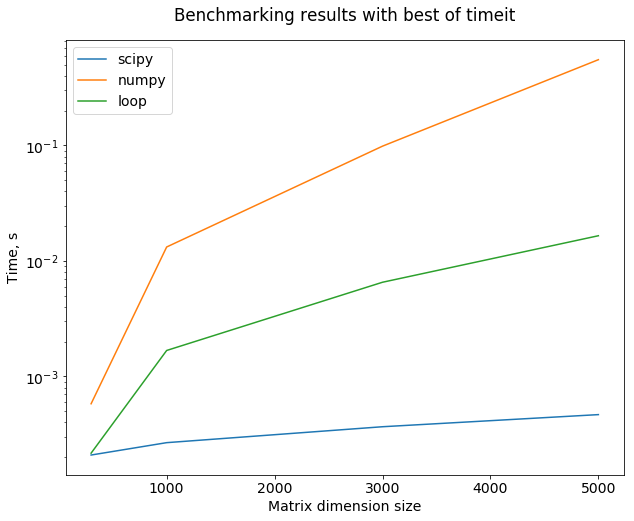

In [47]:
plt.figure(figsize=(10,8))

for bench_name, values in timings_best.iteritems():
    plt.semilogy(dims, values, label=bench_name)
    
plt.legend(loc='best')
plt.title('Benchmarking results with best of timeit', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

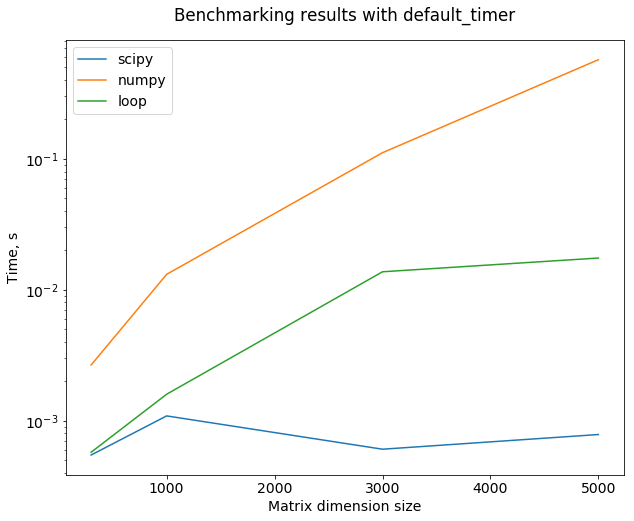

In [48]:
plt.figure(figsize=(10,8))

for bench_name, values in timings.iteritems():
    plt.semilogy(dims, values, label=bench_name)
    
plt.legend(loc='best')
plt.title('Benchmarking results with default_timer', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

### Подумайте, почему:

* "loop" быстрее "numpy"
* "scipy" почти постоянный

**Замечание:** начиная с *python 3.3* рекомендовано использовать ```time.perf_counter()``` и ```time.process_time()```
https://docs.python.org/3/library/time.html#time.perf_counter

Также необходимо помнить, что для более подробного исследования времени выполнения следует использовать инструменты профилирования.

### Комбинированный график одной строкой

Для получения оффлайн справки о функциях можно использовать команду вида ```plt.plot?```

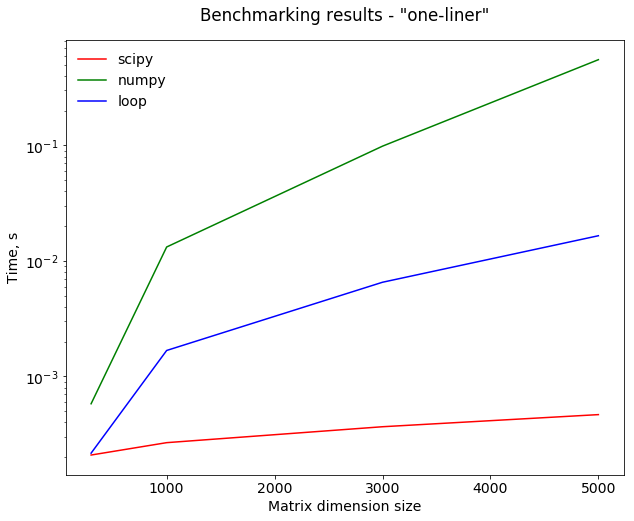

In [49]:
k = len(timings_best)
iter_xyf = [item for sublist in zip([dims]*k,
                                    timings_best.values(),
                                    list('rgb'))\
                                for item in sublist]

plt.figure(figsize=(10, 8))
plt.semilogy(*iter_xyf)

plt.legend(timings_best.keys(), loc=2, frameon=False)
plt.title('Benchmarking results - "one-liner"', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

Более простой способ, позволящий контролировать построение объектов

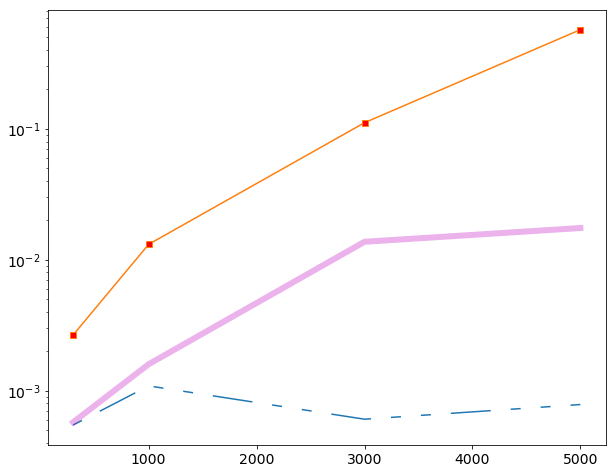

In [50]:
plt.figure(figsize=(10, 8))

figs = [plt.semilogy(dims, values, label=bench_name)\
        for bench_name, values in timings.iteritems()];

ax0, = figs[0]
ax0.set_dashes([5, 10, 20, 10, 5, 10])

ax1, = figs[1]
ax1.set_marker('s')
ax1.set_markerfacecolor('r')

ax2, = figs[2]
ax2.set_linewidth(6)
ax2.set_alpha(0.3)
ax2.set_color('m')

## Форматирование графиков

Matplotlib имеет огромное количество опций для настройки стиля Вашего графика

In [51]:
all_markers = [
'.', # point
',', # pixel
'o', # circle
'v', # triangle down
'^', # triangle up
'<', # triangle_left
'>', # triangle_right
'1', # tri_down
'2', # tri_up
'3', # tri_left
'4', # tri_right
'8', # octagon
's', # square
'p', # pentagon
'*', # star
'h', # hexagon1
'H', # hexagon2
'+', # plus
'x', # x
'D', # diamond
'd', # thin_diamond
'|', # vline
]

all_linestyles = [
'-',  # solid line style
'--', # dashed line style
'-.', # dash-dot line style
':',  # dotted line style
'None'# no line
]

all_colors = [
'b', # blue
'g', # green
'r', # red
'c', # cyan
'm', # magenta
'y', # yellow
'k', # black
'w', # white
]

## Подграфики

Для продвинутого использования подграфиков смотрите следующие ссылки
* http://matplotlib.org/examples/pylab_examples/subplots_demo.html
* http://matplotlib.org/users/tight_layout_guide.html
* http://matplotlib.org/users/gridspec.html

### Итерирование по подграфикам

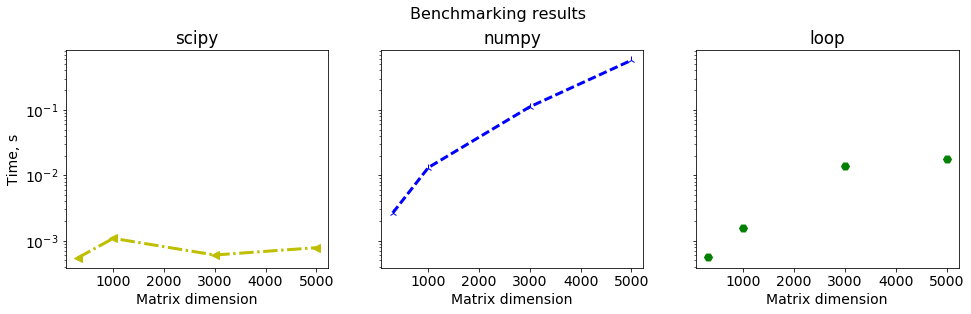

In [54]:
n = len(timings)
experiment_names = timings.keys()

fig, axes = plt.subplots(1, n, sharey=True, figsize=(16,4))

colors = np.random.choice(list('rgbcmyk'), n, replace=False)
markers = np.random.choice(all_markers, n, replace=False)
lines = np.random.choice(all_linestyles, n, replace=False)

for ax_num, ax in enumerate(axes):
    key = experiment_names[ax_num]
    ax.semilogy(dims, timings[key], label=key,
            color=colors[ax_num],
            marker=markers[ax_num],
            markersize=8,
            linestyle=lines[ax_num],
            lw=3)
    ax.set_xlabel('Matrix dimension')
    ax.set_title(key)

axes[0].set_ylabel('Time, s')
plt.suptitle('Benchmarking results', fontsize=16,  y=1.03)


## Другие темы

- Обёртки функций и декораторы

- Установка пакетов

- Импортирование модулей

- Qtconsole

- Окружения

- Расширения

- Профилирование

- Отладка

- Сython & numba

- Openmp

- OOP

- Python 2 vs Python 3

- Визуализация в Python - палитры и карты цветов, стили...

- Pandas - представление результатов

- etc...